In [1]:
import numpy as np
import matplotlib.pyplot as plt

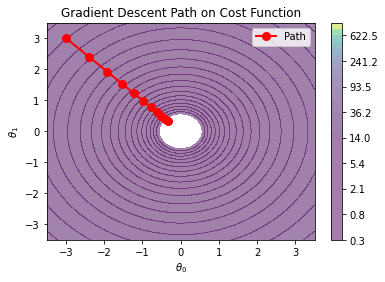

In [7]:
# Define a simple quadratic cost function and its gradient
def cost_function(theta):
    return theta[0]**2 + theta[1]**2

def gradient(theta):
    return 2 * theta

# Initialize parameters and define hyperparameters
theta = np.array([-3, 3])  # Starting point for the parameters
learning_rate = 0.1  # Step size
n_iterations = 10  # Number of steps to take

# Store the path of theta during gradient descent for visualization
theta_path = [theta.copy()]

# Perform gradient descent
for iteration in range(n_iterations):
    grad = gradient(theta)
    theta = theta - learning_rate * grad
    theta_path.append(theta.copy())

# Convert the path to a NumPy array for easy plotting
theta_path = np.array(theta_path)

# Create a grid of values and evaluate the cost function on the grid
x0, x1 = np.meshgrid(np.linspace(-3.5, 3.5, 100), np.linspace(-3.5, 3.5, 100))
z = x0**2 + x1**2

# Plot the contours of the cost function
plt.contourf(x0, x1, z, levels=np.logspace(-0.5, 3, 35), alpha=0.5)
plt.colorbar()

# Plot the path of theta
plt.plot(theta_path[:, 0], theta_path[:, 1], "ro-", linewidth=2, markersize=8, label='Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Gradient Descent Path on Cost Function')
plt.legend()

plt.show()

In [2]:
# Generate some random data to represent a simple linear relationship
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

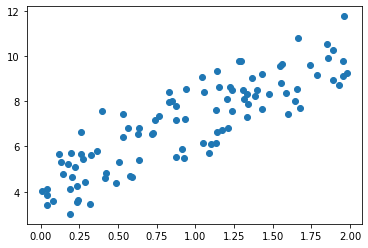

In [4]:
plt.scatter(X,y)
plt.show()

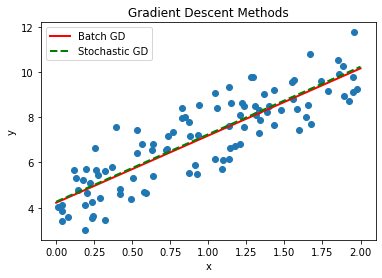

(array([[4.22215108],
        [2.96846751]]),
 array([[4.26573668],
        [2.98309643]]))

In [6]:
# Define the batch gradient descent algorithm
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

# Define the stochastic gradient descent algorithm
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50, t0=5, t1=50):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
    theta = np.random.randn(2, 1)  # random initialization
    
    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
    return theta

# Apply batch gradient descent
theta_bgd = batch_gradient_descent(X, y)

# Apply stochastic gradient descent
theta_sgd = stochastic_gradient_descent(X, y)

# Plot the results
plt.scatter(X, y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict_bgd = X_new_b.dot(theta_bgd)
y_predict_sgd = X_new_b.dot(theta_sgd)
plt.plot(X_new, y_predict_bgd, "r-", linewidth=2, label="Batch GD")
plt.plot(X_new, y_predict_sgd, "g--", linewidth=2, label="Stochastic GD")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Descent Methods')
plt.show()

theta_bgd, theta_sgd

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

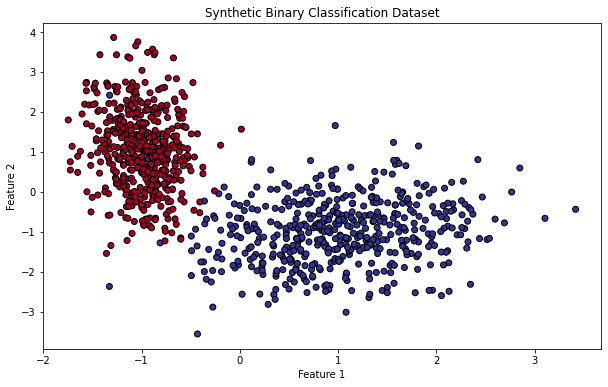

In [21]:
# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=33, n_clusters_per_class=1)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.show()

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
log_reg = LogisticRegression()

# Train the classifier on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Predict probabilities on the testing data
y_prob = log_reg.predict_proba(X_test)

# Calculate the log loss on the testing data
loss = log_loss(y_test, y_prob)

# Print the log loss
print(f"Log Loss on the testing data: {loss:.4f}")

Log Loss on the testing data: 0.0285


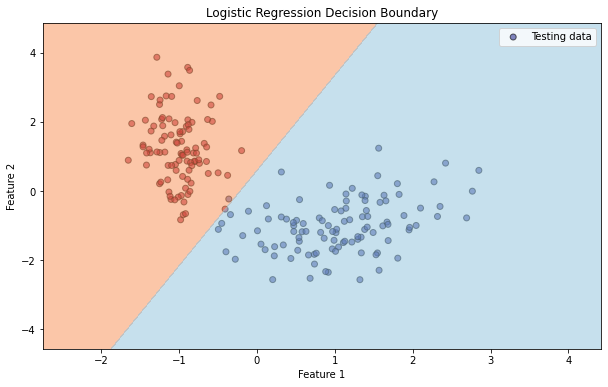

In [26]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k', alpha=0.6, label='Testing data')

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities on the mesh
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdYlBu, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [29]:
# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

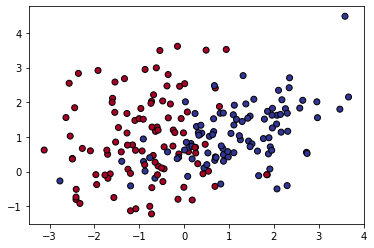

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.show()

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [31]:
# Predict on the testing data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8750


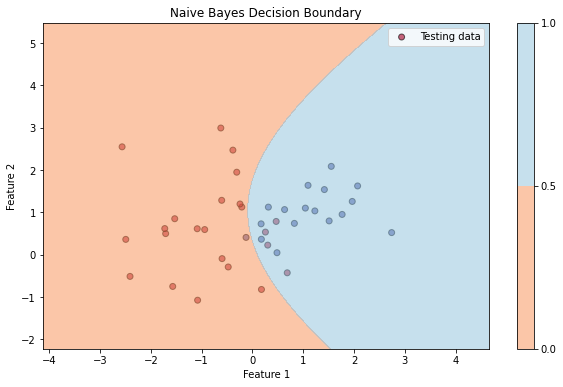

In [33]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k', alpha=0.6, label='Testing data')

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities on the mesh
Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdYlBu, alpha=0.5)
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundary')
plt.legend()
plt.show()